In [617]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv(filename):
  """Reads a csv file and returns a list of points."""
  points = []
  with open(filename, 'r') as f:
    for line in f:
      points.append([float(x) for x in line.split(',')])
  return points

In [618]:
def distance(p1, p2):
  """Returns the distance between two points."""
  return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [619]:
def tsp(points, alpha, max_temp, min_temp, num_iterations):
    """Solve the TSP problem using simulated annealing."""
    # Initialize the solution.
    solution = np.arange(len(points))
    best_solution = solution.copy()


    # Initialize the temperature.
    temp = max_temp

    # Initialize the cost to a value as high as possible - in this case, it is infinity.
    cost = np.inf
    best_cost = cost

    # Initialize the list to store costs and temp
    costs = []
    temperatures =[]
    best_solutions = []

    # Iterate for the specified number of iterations.
    for i in range(num_iterations):
        # Choose two random cities.
        c1 = np.random.randint(len(points))
        c2 = np.random.randint(len(points))

        # Swap the cities.
        solution[c1], solution[c2] = solution[c2], solution[c1]

        # Calculate the new cost.
        new_cost = 0
        for i in range(len(solution) - 1):
            new_cost += distance(points[solution[i]], points[solution[i + 1]])
        new_cost += distance(points[solution[-1]], points[solution[0]])
        
        print("New Cost:", new_cost)
        print("==========================")

        # Accept the new solution if it is better than the old solution.
        if new_cost < cost:
            cost = new_cost
            best_solution = solution.copy()
            best_cost = cost
        else:
            # Otherwise, accept the new solution with a probability of e^(-(new_cost - cost) / temp).
            if np.random.random() < np.exp(-(new_cost - cost) / temp):
                cost = new_cost
            else:
                # Revert the swap if the new solution is not accepted.
                solution[c1], solution[c2] = solution[c2], solution[c1]

        # Decrease the temperature.
        temp *= alpha

        # Add the current cost to the costs list.
        costs.append(cost)
        temperatures.append(temp)
        best_solutions.append(best_solution)
        
        # Print values for examination.
        print(f"Iteration: {i+1}")
        print(f"Current Solution: {solution}")
        print(f"Best Solution: {best_solution}")
        print(f"Current Cost: {cost}")
        print(f"Best Cost: {best_cost}")
        print(f"Temperature: {temp}")
        print("==========================")

    # Return the best solution and the costs list.
    return best_solution, costs, temperatures, best_solutions

In [620]:
def plot_cost_and_temperature(costs, temperatures):
    """Plots the cost and temperature versus iteration on the same graph."""
    iterations = range(len(costs))
    fig, ax1 = plt.subplots()

    ax1.plot(iterations, costs, 'b-', label='Cost/Distance')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Cost/Distance', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(iterations, temperatures, 'r-', label='Temperature')
    ax2.set_ylabel('Temperature', color='r')
    ax2.tick_params('y', colors='r')

    plt.title('Cost/Distance and Temperature vs Iteration')
    plt.legend(loc='upper left')
    plt.show()

In [621]:

def plot_best_solution(points, best_solution):
    """Plots the best solution as a single line."""
    plt.figure(figsize=(10, 6))
    x = [points[i][0] for i in best_solution]
    y = [points[i][1] for i in best_solution]
    plt.plot(x, y, 'b-')
    plt.title('Best Solution')
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.show()

In [622]:
def main():
    # Read the data from the csv file.
    points = read_csv('TSPMatrix.csv')

    # Set the parameters.
    alpha = 0.995
    max_temp = 10
    min_temp = 0.01
    num_iterations = 5000

     # Solve the TSP problem.
    best_solution, costs, temperatures, best_solutions = tsp(points, alpha, max_temp, min_temp, num_iterations)

    # Plot the cost and temperature versus iteration.
    plot_cost_and_temperature(costs, temperatures)

    # Plot the best solution.
    plot_best_solution(points, best_solution)
    
  
    

New Cost: 31.062988047907687
Iteration: 23
Current Solution: [ 0  1  2  3  4  5  6  7  8  9 10 16 12 13 14 15 11 17 18 19 20 21 22 23]
Best Solution: [ 0  1  2  3  4  5  6  7  8  9 10 16 12 13 14 15 11 17 18 19 20 21 22 23]
Current Cost: 31.062988047907687
Best Cost: 31.062988047907687
Temperature: 9.95
New Cost: 43.78356771434541
Iteration: 23
Current Solution: [ 0  1  2  3  4  5  6  7  8  9 10 16 12 13 14 15 11 17 18 19 20 21 22 23]
Best Solution: [ 0  1  2  3  4  5  6  7  8  9 10 16 12 13 14 15 11 17 18 19 20 21 22 23]
Current Cost: 31.062988047907687
Best Cost: 31.062988047907687
Temperature: 9.90025
New Cost: 38.457368371175555
Iteration: 23
Current Solution: [ 0  1  2  3  4  5  6  7  8  9 10 16 12 13 14 15 11 17 18 19 20 21 22 23]
Best Solution: [ 0  1  2  3  4  5  6  7  8  9 10 16 12 13 14 15 11 17 18 19 20 21 22 23]
Current Cost: 31.062988047907687
Best Cost: 31.062988047907687
Temperature: 9.85074875
New Cost: 44.08876309964189
Iteration: 23
Current Solution: [ 0  1  2  3  4  

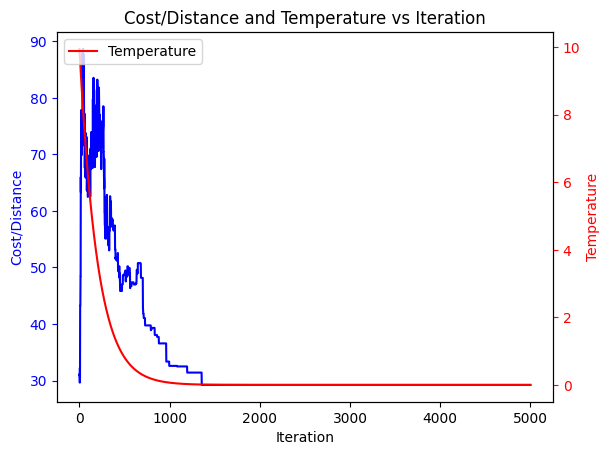

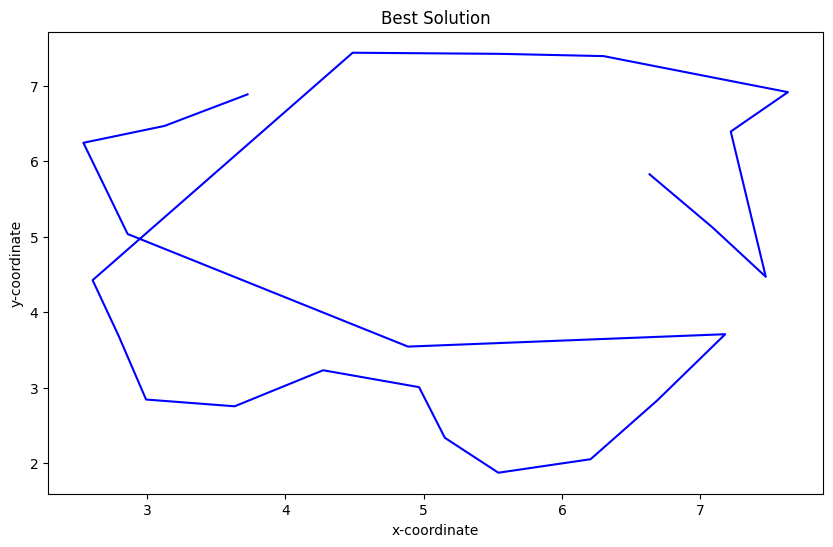

In [623]:
if __name__ == '__main__':
  main()